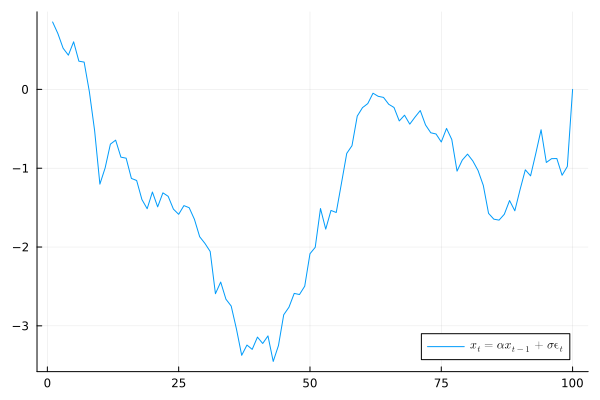

In [1]:
## Lecture 2: Question 8
##
using Plots, LaTeXStrings
x_0 = 1.0
T = 100
ϵ = randn(T)
x = zeros(T)
x_T = 0.0
α = 1.0
σ = 0.2

for t in 1:T
    if t == 1
        x[t] = α * x_0 + σ * ϵ[t]
    elseif t < T
        x[t] = α * x[t-1] + σ * ϵ[t]
    else
        x[t] = x_T
    end
end

plot(x, label = L"x_t = α x_{t-1} + σ ϵ_t")

## Atkinson Index used to measure inequality
$$A_{\epsilon} = 
\begin{cases}
1- \frac{ (\frac{1}{n} \sum x_i^{1-\epsilon} )}{ \frac{1}{n} \sum x_i } & \epsilon \neq 1 \\
1 - \frac{ ( \prod x_i)^{\frac{1}{n}}}{ \frac{1}{n} \sum x_i} & \epsilon = 1
\end{cases}$$
### Code to generate an Atkinson Index:

val = 68.64113533839127
num = 0.47116054605433466
val = 49.71381353183476
den = 0.4971381353183476
A = 0.947745732184923


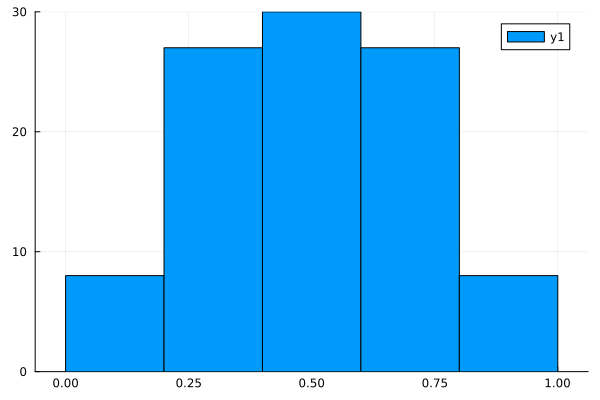

In [2]:
using LaTeXStrings, Plots, Statistics, LinearAlgebra, Distributions 

n = 100 ## Population size
#distribution = Chisq(3) ## Distribution of incomes
distribution = LogitNormal() ## Distribution of income
x = rand(distribution, n) ## Vector of incomes
ϵ = 0.5 ## Inequality aversion parameter
val = 0.0 ## Initialise val

for i in 1:n
    if i == 1
        val = x[i]^(1-ϵ)
    else
    val += x[i]^(1-ϵ)
    end
end

@show val

num = (1/n*val)^(1/(1-ϵ))

@show num

for i in 1:n
    if i == 1
        val = x[i]
    else
        val += x[i]
    end
end

@show val

den = 1/n*val

@show den

A = num/den

@show A

histogram(x)


In [2]:
## Visualising what Eaton et al., (2011) are writting about
##
## Packages
##
using LaTeXStrings, Plots, Statistics, LinearAlgebra, Distributions

## Setting up initial parameters
##
N = 100 ## number of countries that French firms sell to
firm_count = Uniform(0, 10) ## randomly assign the number of firms (total and French) in each country
N_nf = round.(Int, rand(firm_count, N)) ## number of French firms in each of the countries
total_exports = Pareto(1, 2) ## distribution of total exports from French firms to countries
X_nf = rand(total_exports, N) ## total exports of French firms to countries
X_n = rand(total_exports, N)  + X_nf ## total manufacturing absorption (total production less exports plus imports (X_nf))
π_nf = X_nf ./ X_n
ρ = X_nf ./ π_nf

100-element Vector{Float64}:
 19.773977113670547
 14.029513936116317
 33.872234862534114
 21.610857908340968
  5.570478009785374
  5.5943832528171065
  6.543081718008832
  5.045664407076803
  4.346038765307793
  4.951870044540244
 29.661447042397672
 11.160987469700284
  7.3009911665661855
  ⋮
 10.186406690732465
  9.447904209531053
 14.073993777123924
  4.890849065513421
  5.331088628302404
 12.913231511583978
  6.486772916138774
  5.505850353320224
 18.762478591344657
  7.36091114726568
  5.67888454223592
  4.414876995739698

## Understanding sales distibutions in Eaton et al., (2011)
Denote the rank, in terms of sales, of French firm $j$ in market $n$, among $N_{nF}$ French firms selling there, as $r_n(j)$, with the largest firm having rank 1.
For each firm, $j$, we calculate
$$\frac{r_n(j) - 0.5}{N_{nF}}$$

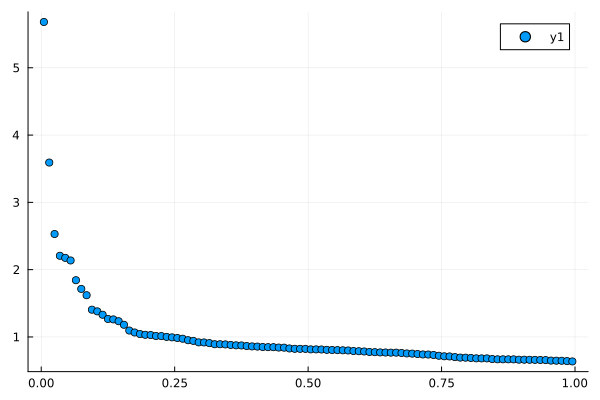

In [3]:
## For example,
##
N_nF = 100 ## total number of French firms
distribution = Pareto(3) ## distibution of firm sales
sales = sort(rand(distribution, N), rev = true) ## sales
y = sales./mean(sales)
r_n = collect(1:N)
x = (r_n.-0.5)./N_nF
scatter(x, y)

In [22]:
N = 100
α = 1
sales_distribution = Pareto(α)
sales = sort(rand(sales_distribution, N))
total_sales = sum(sales)
market_share = sales./total_sales
histogram(market_share)
market_share[7:10]

4-element Vector{Float64}:
 0.0011156923790149635
 0.0011366841414087892
 0.0011391817197883162
 0.0011414260646559855

In [25]:
cumulative_share = cumsum(market_share)

100-element Vector{Float64}:
 0.0010215717703004623
 0.0020897763894837016
 0.0031582648031703575
 0.004236355801956746
 0.005319539790230281
 0.0064277218971118474
 0.007543414276126811
 0.0086800984175356
 0.009819280137323918
 0.010960706201979904
 0.012125281059015315
 0.013307408499238596
 0.014492141892747643
 ⋮
 0.2953626814122455
 0.3091702486302018
 0.3239600466563749
 0.3388749835421485
 0.35781230071867165
 0.38192330644143035
 0.4062699499082913
 0.43066547700382085
 0.46330163491912546
 0.5684876674960945
 0.742379552409211
 1.0

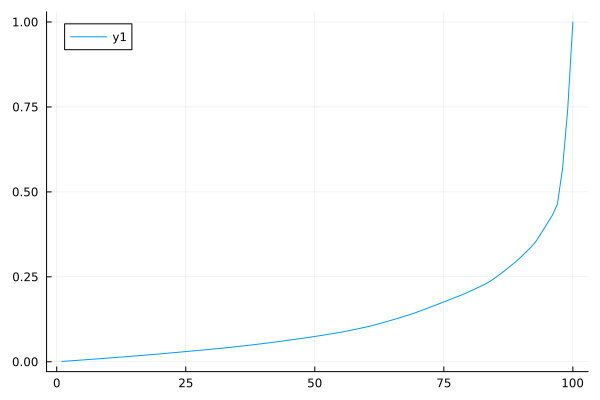

In [26]:
plot(cumulative_share)